# Initialize Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ROOT
import uproot
import os
import sys
import tqdm
import pandas as pd
import pickle as pkl

%jsroot on
# %matplotlib qt
%matplotlib inline

KeyboardInterrupt: 

In [ ]:
sys.path.append('../python/')
from filterMethods import *
from hitAccuracyMethods import *
from statisticsMethods import *
from importMethods import *
from constants import *
from plotParameters import *

In [ ]:
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Load Data

In [ ]:
# fileName = '../runs/event_2mu100MeVBackToBack_usedForTrackReconstruction.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL_+-1.21randPosNoSteps_randDir.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events_20cmFOVL.root'
# fileName = '../build/calibration.root'
# fileName = '../build/event100.root'
fileNames = [
    # '../runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL_+-1.00randPosNoSteps_randDir_v0.root',
    # '../runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL_+-1.00randPosNoSteps_randDir_v1.root',
    # '../runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL_+-1.00randPosNoSteps_randDir_v2.root',
    '../runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL_+-0.00randPosNoSteps_randDir.root',
    # '../build/event100.root'
]

histDir = '/photoSensor_hits_histograms'
# treeName = 'photoSensor_hits;1'

# fileNames = ['../build/multievent_{}.root'.format(i) for i in range(300)] # 100
# minInitialPositions = 1
# minWalls = 1
# fileNames = [fileName for fileName in tqdm.tqdm(fileNames) if len(get_photosensor_hits_position_initial(fileName, treeName)) >= minInitialPositions]
# fileNames = [fileName for fileName in tqdm.tqdm(fileNames) if len(np.unique([x[1] for x in get_photosensor_hits_photosensor_wall(fileName, treeName)])) >= minWalls]
# print('len(fileNames):', len(fileNames))


# for fileName in fileNames:
#     print(get_histogram_names    (fileName, histDir))
#     print(get_histogram_titles   (fileName, histDir))
#     print(get_histogram_positions(fileName, histDir))
#     print(get_histogram_walls    (fileName, histDir))

In [ ]:
treeName_photoSensor = 'photoSensor_hits;1'
treeName_lens        = 'lens_hits;1'
nBins_x = 10 # None # 10
nBins_y = 10 # None # 10
df_hits = pd.DataFrame(columns=['sensor_name', 'sensor_direction', 'sensor_position', 'relativePosition', 'relativePosition_binned', 'time'])
for fileName in tqdm.tqdm(fileNames):
    df_hits_temp = pd.DataFrame()
    df_hits_temp['sensor_name'                        ] = get_photosensor_hits_photosensor_ID              (fileName, treeName_photoSensor)
    df_hits_temp['sensor_direction'                   ] = get_photosensor_hits_photosensor_direction       (fileName, treeName_photoSensor)
    df_hits_temp['sensor_position'                    ] = get_photosensor_hits_photosensor_position        (fileName, treeName_photoSensor)
    df_hits_temp['sensor_wall'                        ] = get_photosensor_hits_photosensor_wall            (fileName, treeName_photoSensor)
    df_hits_temp['relativePosition'                   ] = get_photosensor_hits_position_relative           (fileName, treeName_photoSensor)
    df_hits_temp['relativePosition'                   ] = fixRotations_relative_signs(
        np.array(df_hits_temp['relativePosition'].to_list()), 
        np.array(df_hits_temp['sensor_wall'     ].to_list()),
        handleZ=False
    )
    df_hits_temp['relativePosition_bins_x'            ] = get_photosensor_hits_position_relative_bins      (fileName, treeName_photoSensor, histDir,
                                                                                                            x=np.array(df_hits_temp['relativePosition'].to_list())[:,0],
                                                                                                            y=np.array(df_hits_temp['relativePosition'].to_list())[:,1],
                                                                                                            nBins_x=nBins_x, nBins_y=nBins_y, forDF=False)[0]
    df_hits_temp['relativePosition_bins_y'            ] = get_photosensor_hits_position_relative_bins      (fileName, treeName_photoSensor, histDir,
                                                                                                            x=np.array(df_hits_temp['relativePosition'].to_list())[:,0],
                                                                                                            y=np.array(df_hits_temp['relativePosition'].to_list())[:,1],
                                                                                                            nBins_x=nBins_x, nBins_y=nBins_y, forDF=False)[1]
    df_hits_temp['relativePosition_binned'            ] = get_photosensor_hits_position_relative_binned    (fileName, treeName_photoSensor, histDir,
                                                                                                            x=np.array(df_hits_temp['relativePosition'].to_list())[:,0],
                                                                                                            y=np.array(df_hits_temp['relativePosition'].to_list())[:,1],
                                                                                                            nBins_x=nBins_x, nBins_y=nBins_y)
    df_hits_temp['relativePosition_nBin'              ] = get_photosensor_hits_position_relative_nBin      (fileName, treeName_photoSensor, histDir,
                                                                                                            x=np.array(df_hits_temp['relativePosition'].to_list())[:,0],
                                                                                                            y=np.array(df_hits_temp['relativePosition'].to_list())[:,1],
                                                                                                            nBins_x=nBins_x, nBins_y=nBins_y)
    df_hits_temp['absolutePosition'                   ] = get_photosensor_hits_position_absolute           (fileName, treeName_photoSensor)
    df_hits_temp['initialPosition'                    ] = get_photosensor_hits_position_initial            (fileName, treeName_photoSensor)
    df_hits_temp['time'                               ] = get_photosensor_hits_time                        (fileName, treeName_photoSensor)


    df_hits_temp['direction_relative'                 ] = get_photosensor_hits_direction_relative     (fileName, treeName_photoSensor)
    df_hits_temp['direction_relative_lens_0'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 0)
    df_hits_temp['position_relative_lens_0'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 0)
    df_hits_temp['direction_relative_lens_1'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 1)
    df_hits_temp['position_relative_lens_1'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 1)

    df_hits_temp['direction_relative'                 ] = fixRotations_relative_signs(np.array(df_hits_temp['direction_relative'       ].to_list()), np.array(df_hits_temp['sensor_wall'].to_list()), handleZ=False)
    df_hits_temp['direction_relative_lens_0'          ] = fixRotations_relative_signs(np.array(df_hits_temp['direction_relative_lens_0'].to_list()), np.array(df_hits_temp['sensor_wall'].to_list()), handleZ=False)
    df_hits_temp['position_relative_lens_0'           ] = fixRotations_relative_signs(np.array(df_hits_temp['position_relative_lens_0' ].to_list()), np.array(df_hits_temp['sensor_wall'].to_list()), handleZ=False)
    df_hits_temp['direction_relative_lens_1'          ] = fixRotations_relative_signs(np.array(df_hits_temp['direction_relative_lens_1'].to_list()), np.array(df_hits_temp['sensor_wall'].to_list()), handleZ=False)
    df_hits_temp['position_relative_lens_1'           ] = fixRotations_relative_signs(np.array(df_hits_temp['position_relative_lens_1' ].to_list()), np.array(df_hits_temp['sensor_wall'].to_list()), handleZ=False)

    df_hits_temp = df_hits_temp[df_hits_temp['direction_relative_lens_0'] != (0, 0, 0)]
    df_hits_temp = df_hits_temp[df_hits_temp['direction_relative_lens_1'] != (0, 0, 0)]
    df_hits_temp = df_hits_temp[df_hits_temp['position_relative_lens_0' ] != (0, 0, 0)]
    df_hits_temp = df_hits_temp[df_hits_temp['position_relative_lens_1' ] != (0, 0, 0)]

    df_hits_temp['direction_relative_lens_0_theta'    ] = df_hits_temp['direction_relative_lens_0'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
    df_hits_temp['direction_relative_lens_0_phi'      ] = df_hits_temp['direction_relative_lens_0'].apply(lambda x: np.arctan2(x[1], x[0]))
    df_hits_temp['position_relative_lens_0_phi'       ] = df_hits_temp['position_relative_lens_0' ].apply(lambda x: np.arctan2(x[1], x[0]))
    df_hits_temp['direction_relative_lens_1_theta'    ] = df_hits_temp['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
    df_hits_temp['direction_relative_lens_1_phi'      ] = df_hits_temp['direction_relative_lens_1'].apply(lambda x: np.arctan2(x[1], x[0]))
    df_hits_temp['position_relative_lens_1_phi'       ] = df_hits_temp['position_relative_lens_1' ].apply(lambda x: np.arctan2(x[1], x[0]))
    df_hits_temp['direction_relative_phi'             ] = df_hits_temp['direction_relative'       ].apply(lambda x: np.arctan2(x[1], x[0]))
    df_hits_temp['position_relative_phi'              ] = df_hits_temp['relativePosition'         ].apply(lambda x: np.arctan2(x[1], x[0]))

    df_hits_temp['theta_error'] = df_hits_temp['direction_relative_lens_0_theta'] - df_hits_temp['direction_relative_lens_1_theta']
    df_hits_temp['phi_error'  ] = df_hits_temp['direction_relative_lens_0_phi'  ] - df_hits_temp['direction_relative_lens_1_phi'  ]
    df_hits_temp['phi_error'  ] = boundAngle(df_hits_temp['phi_error']).to_list()

    df_hits = pd.concat([df_hits, df_hits_temp], ignore_index=True)

  0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_75536/2356001745.py:59: RuntimeWarning: invalid value encountered in double_scalars
  df_hits_temp['direction_relative_lens_1_theta'    ] = df_hits_temp['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
/Users/noah-everett/Documents/FNAL/Geant4/USSD_Geant4/analysis/../python/hitAccuracyMethods.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle[angle > np.pi] -= 2 * np.pi
/Users/noah-everett/Documents/FNAL/Geant4/USSD_Geant4/analysis/../python/hitAccuracyMethods.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle[angl

# Filter Hits

In [ ]:
search_radius = 0
search_number = 0

df_hits = filter_hits(df_hits, radius=search_radius, number=search_number)
print(len(df_hits))

8223


In [ ]:
binned = True

def rToTheta(r):
    return r/(CM_PER_RAD*MM_PER_CM)
df_hits = make_r(df_hits, binned=binned)
df_hits = make_theta(df_hits, rToTheta, binned=binned)
df_hits = make_phi(df_hits, binned=binned)

df_hits['phi'], df_hits['theta'] = changePhiSignWithTheta(df_hits['phi'], df_hits['theta'])
df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_lens_0_theta'] = changePhiSignWithTheta(df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_lens_0_theta'])

df_hits = filter_r(df_hits, Y_LIM)

In [ ]:
print('max reco theta:', df_hits['theta'].max())
print('min reco theta:', df_hits['theta'].min())
print('max reco phi:', df_hits['phi'].max())
print('min reco phi:', df_hits['phi'].min())
print()
print('max L0 theta:', df_hits['direction_relative_lens_0_theta'].max())
print('min L0 theta:', df_hits['direction_relative_lens_0_theta'].min())
print('max L0 phi:', df_hits['direction_relative_lens_0_phi'].max())
print('min L0 phi:', df_hits['direction_relative_lens_0_phi'].min())

max reco theta: 0.2609532587467467
min reco theta: 0.0289948065274163
max reco phi: 3.0309354324158977
min reco phi: -3.0309354324158977

max L0 theta: 2.807921662753154
min L0 theta: 0.002483868819665103
max L0 phi: 3.139771440478135
min L0 phi: -3.1412187828156446


# Make PDF Maps

In [ ]:
filterDirection = True
findNhitsMax = True
nHitsMax = np.inf
nBins = (2, 2)

maxTheta, minTheta = df_hits['direction_relative_lens_0_theta'].max(), df_hits['direction_relative_lens_0_theta'].min()
maxPhi, minPhi = df_hits['direction_relative_lens_0_phi'].max(), df_hits['direction_relative_lens_0_phi'].min()

# limitTheta = [minTheta, maxTheta]
# limitPhi = [minPhi, maxPhi]
limitTheta = [0, np.pi/12]
limitPhi = [-np.pi, np.pi]

relativePositionBin = df_hits['relativePosition_nBin'].unique()

if filterDirection and findNhitsMax:
    for bin in tqdm.tqdm(relativePositionBin):
        ind   = (df_hits['relativePosition_nBin'] == bin).to_list()
        phi   = np.array(df_hits['direction_relative_lens_0_phi'  ].loc[ind].to_list())
        theta = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())
        bins, xedges, yedges = np.histogram2d(theta, phi, bins=nBins, density=False, range=[limitTheta, limitPhi])
        # print(bins)
        if min(bins.flatten()) < nHitsMax: nHitsMax = min(bins.flatten())
        if nHitsMax == 0: 
            print(bin)
            print(bins)
            print(xedges)
            print(yedges)
            break

print('nHitsMax:', nHitsMax)
if nHitsMax <= 0:
    raise ValueError('nHitsMax is less than or equal to 0')

if filterDirection:
    df_hits_filtered = pd.DataFrame(columns=df_hits.columns)
    for bin in tqdm.tqdm(relativePositionBin):
        ind   = np.array((df_hits['relativePosition_nBin'] == bin).to_list())
        phi   = np.array(df_hits['direction_relative_lens_0_phi'  ].loc[ind].to_list())
        theta = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())
        _, xedges, yedges = np.histogram2d(theta, phi, bins=nBins, density=False, range=[[0, np.pi], [-np.pi, np.pi]])
        xedges, yedges = np.meshgrid(xedges, yedges)
        ind = np.where(ind)[0]
        for xi_lower, xi_upper, yi_lower, yi_upper in zip(xedges[:-1].flatten(), xedges[1:].flatten(), yedges[:-1].flatten(), yedges[1:].flatten()):
            ind_cur = ind[np.where((theta >= xi_lower) & (theta < xi_upper) & (phi >= yi_lower) & (phi < yi_upper))[0]]
            ind_rand = np.random.choice(ind_cur, nHitsMax, replace=False)
            df_hits_filtered = pd.concat([df_hits_filtered, df_hits.loc[ind_rand]], ignore_index=True)

    df_hits = df_hits_temp # .copy()?

  1%|          | 2/225 [00:00<00:03, 63.55it/s]

(1, 0)
[[31.  0.]
 [85.  0.]]
[0.         0.13089969 0.26179939]
[-3.14159265  0.          3.14159265]
nHitsMax: 0.0


ValueError: nHitsMax is less than or equal to 0

In [ ]:
relativePositionBin = df_hits['relativePosition_nBin'].unique()

PDFs = {}

n = -1
lowerBound = 0
i = -1
for bin in tqdm.tqdm(relativePositionBin):
    i += 1
    ind     = (df_hits['relativePosition_nBin'] == bin).to_list()
    pos     = np.array(df_hits['relativePosition_binned'        ].loc[ind].to_list())
    pos     = np.unique(pos, axis=0).astype(int)
    bin_x   = np.array(df_hits['relativePosition_bins_x'        ].loc[ind].to_list())
    bin_x   = np.unique(bin_x)
    bin_y   = np.array(df_hits['relativePosition_bins_y'        ].loc[ind].to_list())
    bin_y   = np.unique(bin_y)
    phi     = np.array(df_hits['direction_relative_lens_0_phi'  ].loc[ind].to_list())
    theta   = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())
    r_r     = np.array(df_hits['r'                              ].loc[ind].to_list())
    r_r     = np.unique(r_r)
    phi_r   = np.array(df_hits['phi'                            ].loc[ind].to_list())
    phi_r   = np.unique(phi_r)
    theta_r = np.array(df_hits['theta'                          ].loc[ind].to_list())
    theta_r = np.unique(theta_r)

    if len(theta) < lowerBound:
        continue

    ind = np.isnan(theta)
    theta = theta[~ind]
    phi   = phi  [~ind]

    ind = np.isnan(phi)
    theta = theta[~ind]
    phi   = phi  [~ind]

    # fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    # ax.hist2d(theta, phi, bins=10, norm=None, cmap='viridis')
    # ax.scatter(theta_r, phi_r, color='red', s=40)
    # ax.set_xlabel('theta')
    # ax.set_ylabel('phi')
    # ax.set_title('theta vs phi')

    bins, xedges, yedges = np.histogram2d(theta, phi, bins=100, density=True)
    posx, posy = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
    posx /= 2
    posy /= 2
    PDFs[(pos[0,0], pos[0,1])] = (bins, posx, posy)

    if i >= n and n != -1:
        break

# pkl.dump(PDFs, open('data/PDFs_only000.pkl', 'wb'))
pkl.dump(PDFs, open('data/PDFs_all1m.pkl', 'wb'))

100%|██████████| 100/100 [00:00<00:00, 289.38it/s]


In [ ]:
raise Exception('stop')

Exception: stop

# Sanity Check Plot

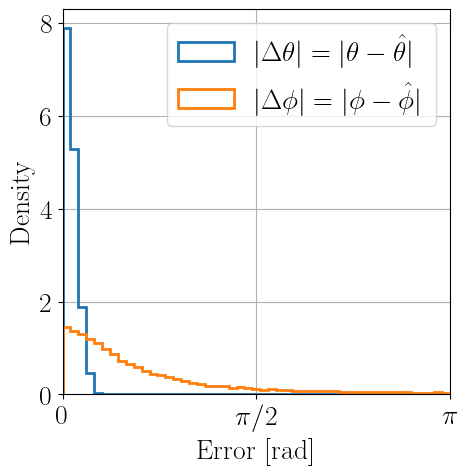

In [ ]:
nBins = 50
lw = 2

density = True
cumulative = False
abs = True

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(error_theta, bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\theta}=\abs{\theta-\hat{\theta}}$' if abs else r'$\Delta\theta=\theta-\hat{\theta}$',
        density=density, cumulative=cumulative)
ax.hist(error_phi  , bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\phi}=\abs{\phi-\hat{\phi}}$' if abs else r'$\Delta\phi=\phi-\hat{\phi}$',
        density=density, cumulative=cumulative)
ax.legend()
ax.set_xlabel('Error [rad]')
ax.set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax.set_xticks(np.linspace(0, np.pi, 3))
    ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(0, np.pi)
else:
    ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(-np.pi, np.pi)

ax.grid()

plt.savefig('../figures/theta_phi_error.pdf', bbox_inches='tight')
plt.show()

# PDF Plots

  0%|          | 0/300 [09:12<?, ?it/s]


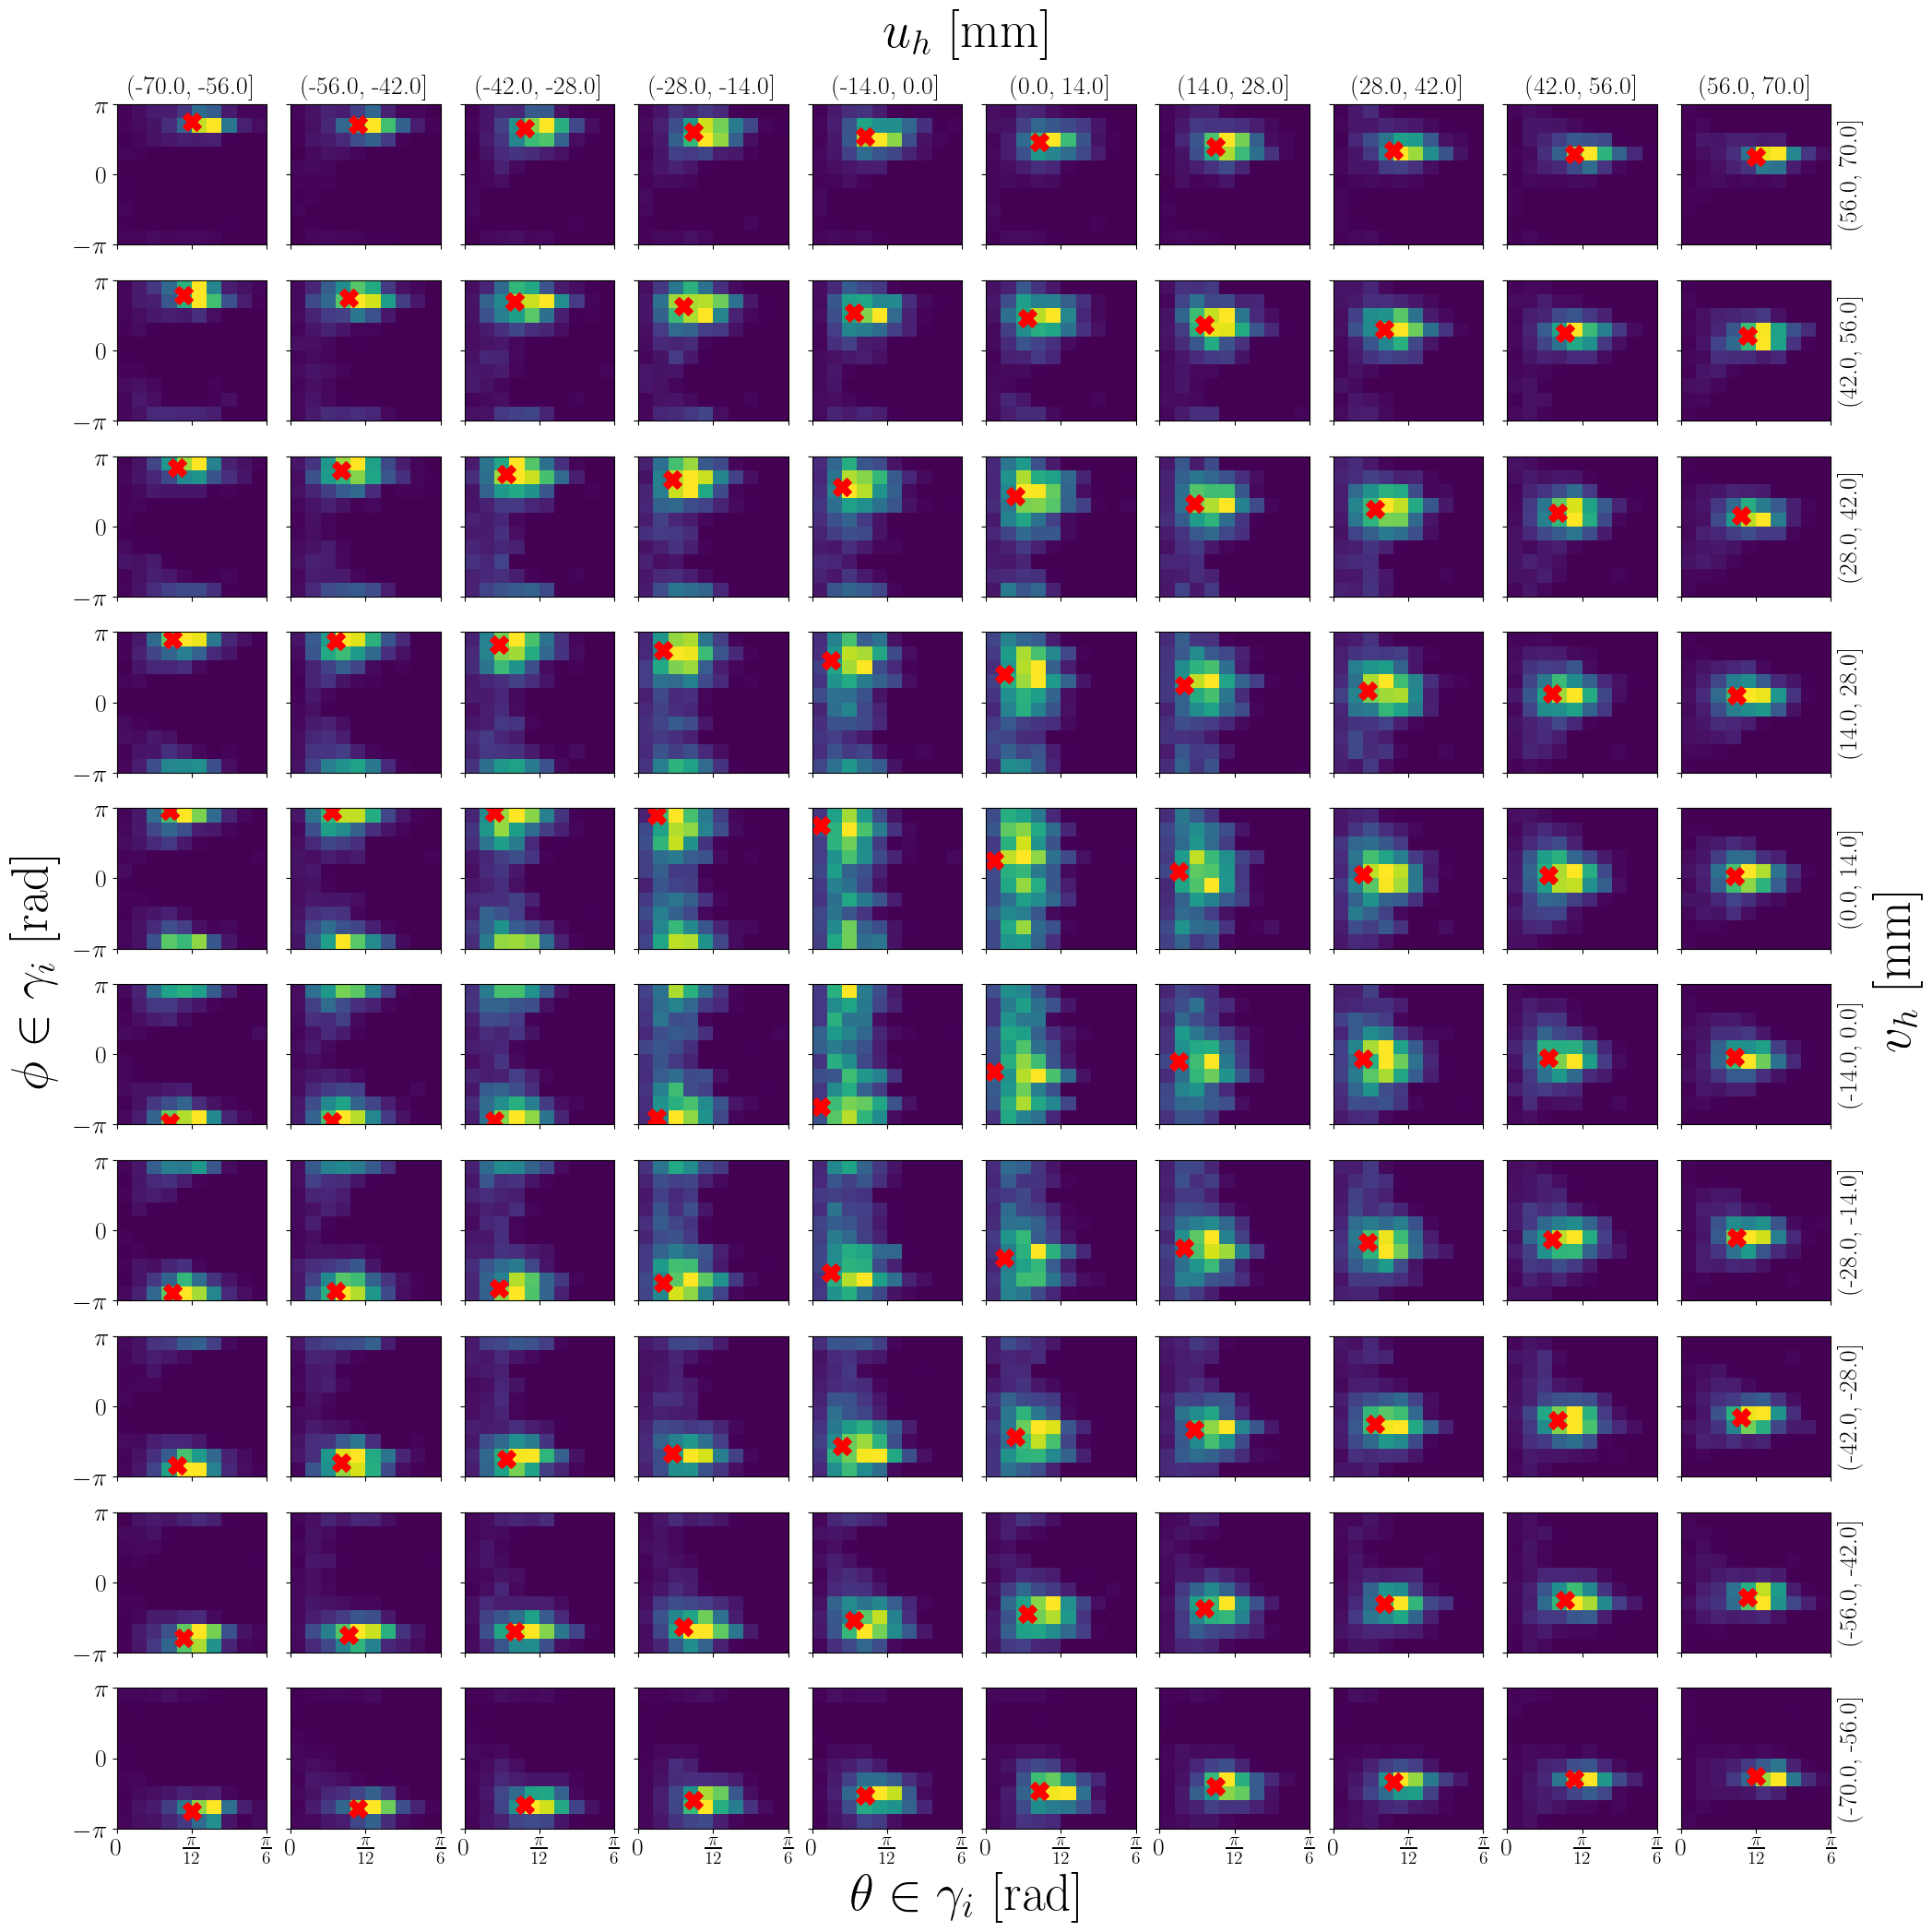

In [ ]:
relativePositionBin = df_hits['relativePosition_nBin'].unique()

if nBins_x is None:
    nBins_x = len(df_hits['relativePosition_bins_x'].unique())
if nBins_y is None:
    nBins_y = len(df_hits['relativePosition_bins_y'].unique())
fig, ax = plt.subplots(nBins_x, nBins_y, figsize=(20, 20))

theta_max = np.pi/6

for nx in range(nBins_x):
    for ny in range(nBins_y):
        ind = (df_hits['relativePosition_nBin'] == (nx, ny)).to_list()
        pos = np.array(df_hits['relativePosition_binned'].loc[ind].to_list())
        pos = np.unique(pos)
        bin_x = np.array(df_hits['relativePosition_bins_x'].loc[ind].to_list())
        bin_x = np.unique(bin_x)
        if len(bin_x) == 0:
            continue
        bin_y = np.array(df_hits['relativePosition_bins_y'].loc[ind].to_list())
        bin_y = np.unique(bin_y)
        phi = np.array(df_hits['direction_relative_lens_0_phi'].loc[ind].to_list())
        theta = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())
        r_r = np.array(df_hits['r'].loc[ind].to_list())
        r_r = np.unique(r_r)
        phi_r = np.array(df_hits['phi'].loc[ind].to_list())
        phi_r = np.unique(phi_r)
        theta_r = np.array(df_hits['theta'].loc[ind].to_list())
        theta_r = np.unique(theta_r)

        if len(theta) < lowerBound:
            continue

        ind = np.isnan(theta)
        theta = theta[~ind]
        phi = phi[~ind]

        ind = np.isnan(phi)
        theta = theta[~ind]
        phi = phi[~ind]

        ax[nBins_y - 1 - ny, nx].hist2d(theta, phi, bins=10, norm=None, cmap='viridis', range=[[0, theta_max], [-np.pi, np.pi]], density=True)
        ax[nBins_y - 1 - ny, nx].scatter(theta_r, phi_r, color='red', s=200, marker='X')
        ax[nBins_y - 1 - ny, nx].set_xticks([0, np.pi/12, np.pi/6])
        ax[nBins_y - 1 - ny, nx].set_yticks([-np.pi, 0, np.pi])
        ax[nBins_y - 1 - ny, nx].set_xticklabels([])
        ax[nBins_y - 1 - ny, nx].set_yticklabels([])
        ax[nBins_y - 1 - ny, nx].set_xlim(0, theta_max)
        ax[nBins_y - 1 - ny, nx].set_ylim(-np.pi, np.pi)
        ax[nBins_y - 1 - ny, nx].set_xlabel(bin_x[0], labelpad=8)
        ax[nBins_y - 1 - ny, nx].set_ylabel(bin_y[0], labelpad=5)
        ax[nBins_y - 1 - ny, nx].xaxis.set_label_position('top')
        ax[nBins_y - 1 - ny, nx].yaxis.set_label_position('right')
        # cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax[nBins_y - 1 - ny, nx], orientation='horizontal')

nTicks = 3
for a in ax[-1,:]:
    a.set_xticks([0, np.pi/12, np.pi/6])
    a.set_xticklabels([r'$0$', r'$\frac{\pi}{12}$', r'$\frac{\pi}{6}$'])
for a in ax[:,0]:
    a.set_yticks([-np.pi, 0, np.pi])
    a.set_yticklabels([r'$-\pi$', r'$0$', r'$\pi$'])

for a in ax[:,:-1].flatten():
    a.set_ylabel('')
for a in ax[1:,:].flatten():
    a.set_xlabel('')

# fig.text(0.5, -0.01, r'$(\theta\in\gamma_i)\in[0,\pi/6)$ [rad]', ha='center', fontsize=40)
# fig.text(-0.02, 0.5, r'$\phi\in\gamma_i\in[-\pi,\pi)$ [rad]'   , va='center', fontsize=40, rotation='vertical')
fig.text(0.5, -0.01, r'$\theta\in\gamma_i$ [rad]', ha='center', fontsize=40)
fig.text(-0.02, 0.5, r'$\phi\in\gamma_i$ [rad]'   , va='center', fontsize=40, rotation='vertical')
fig.text(0.5, 1.00, r'$u_h$ [mm]', ha='center', fontsize=40)
fig.text(0.99, 0.5, r'$v_h$ [mm]', va='center', fontsize=40, rotation='vertical')

# fig.text(0.03, -0.002, r'$\longrightarrow$', ha='center', fontsize=40)
# fig.text(-0.008, 0.03, r'$\longrightarrow$', va='center', rotation='vertical', fontsize=40)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

# plt.savefig('../figures/relativePositionVsIncomingDirection.pdf', bbox_inches='tight')
plt.show()

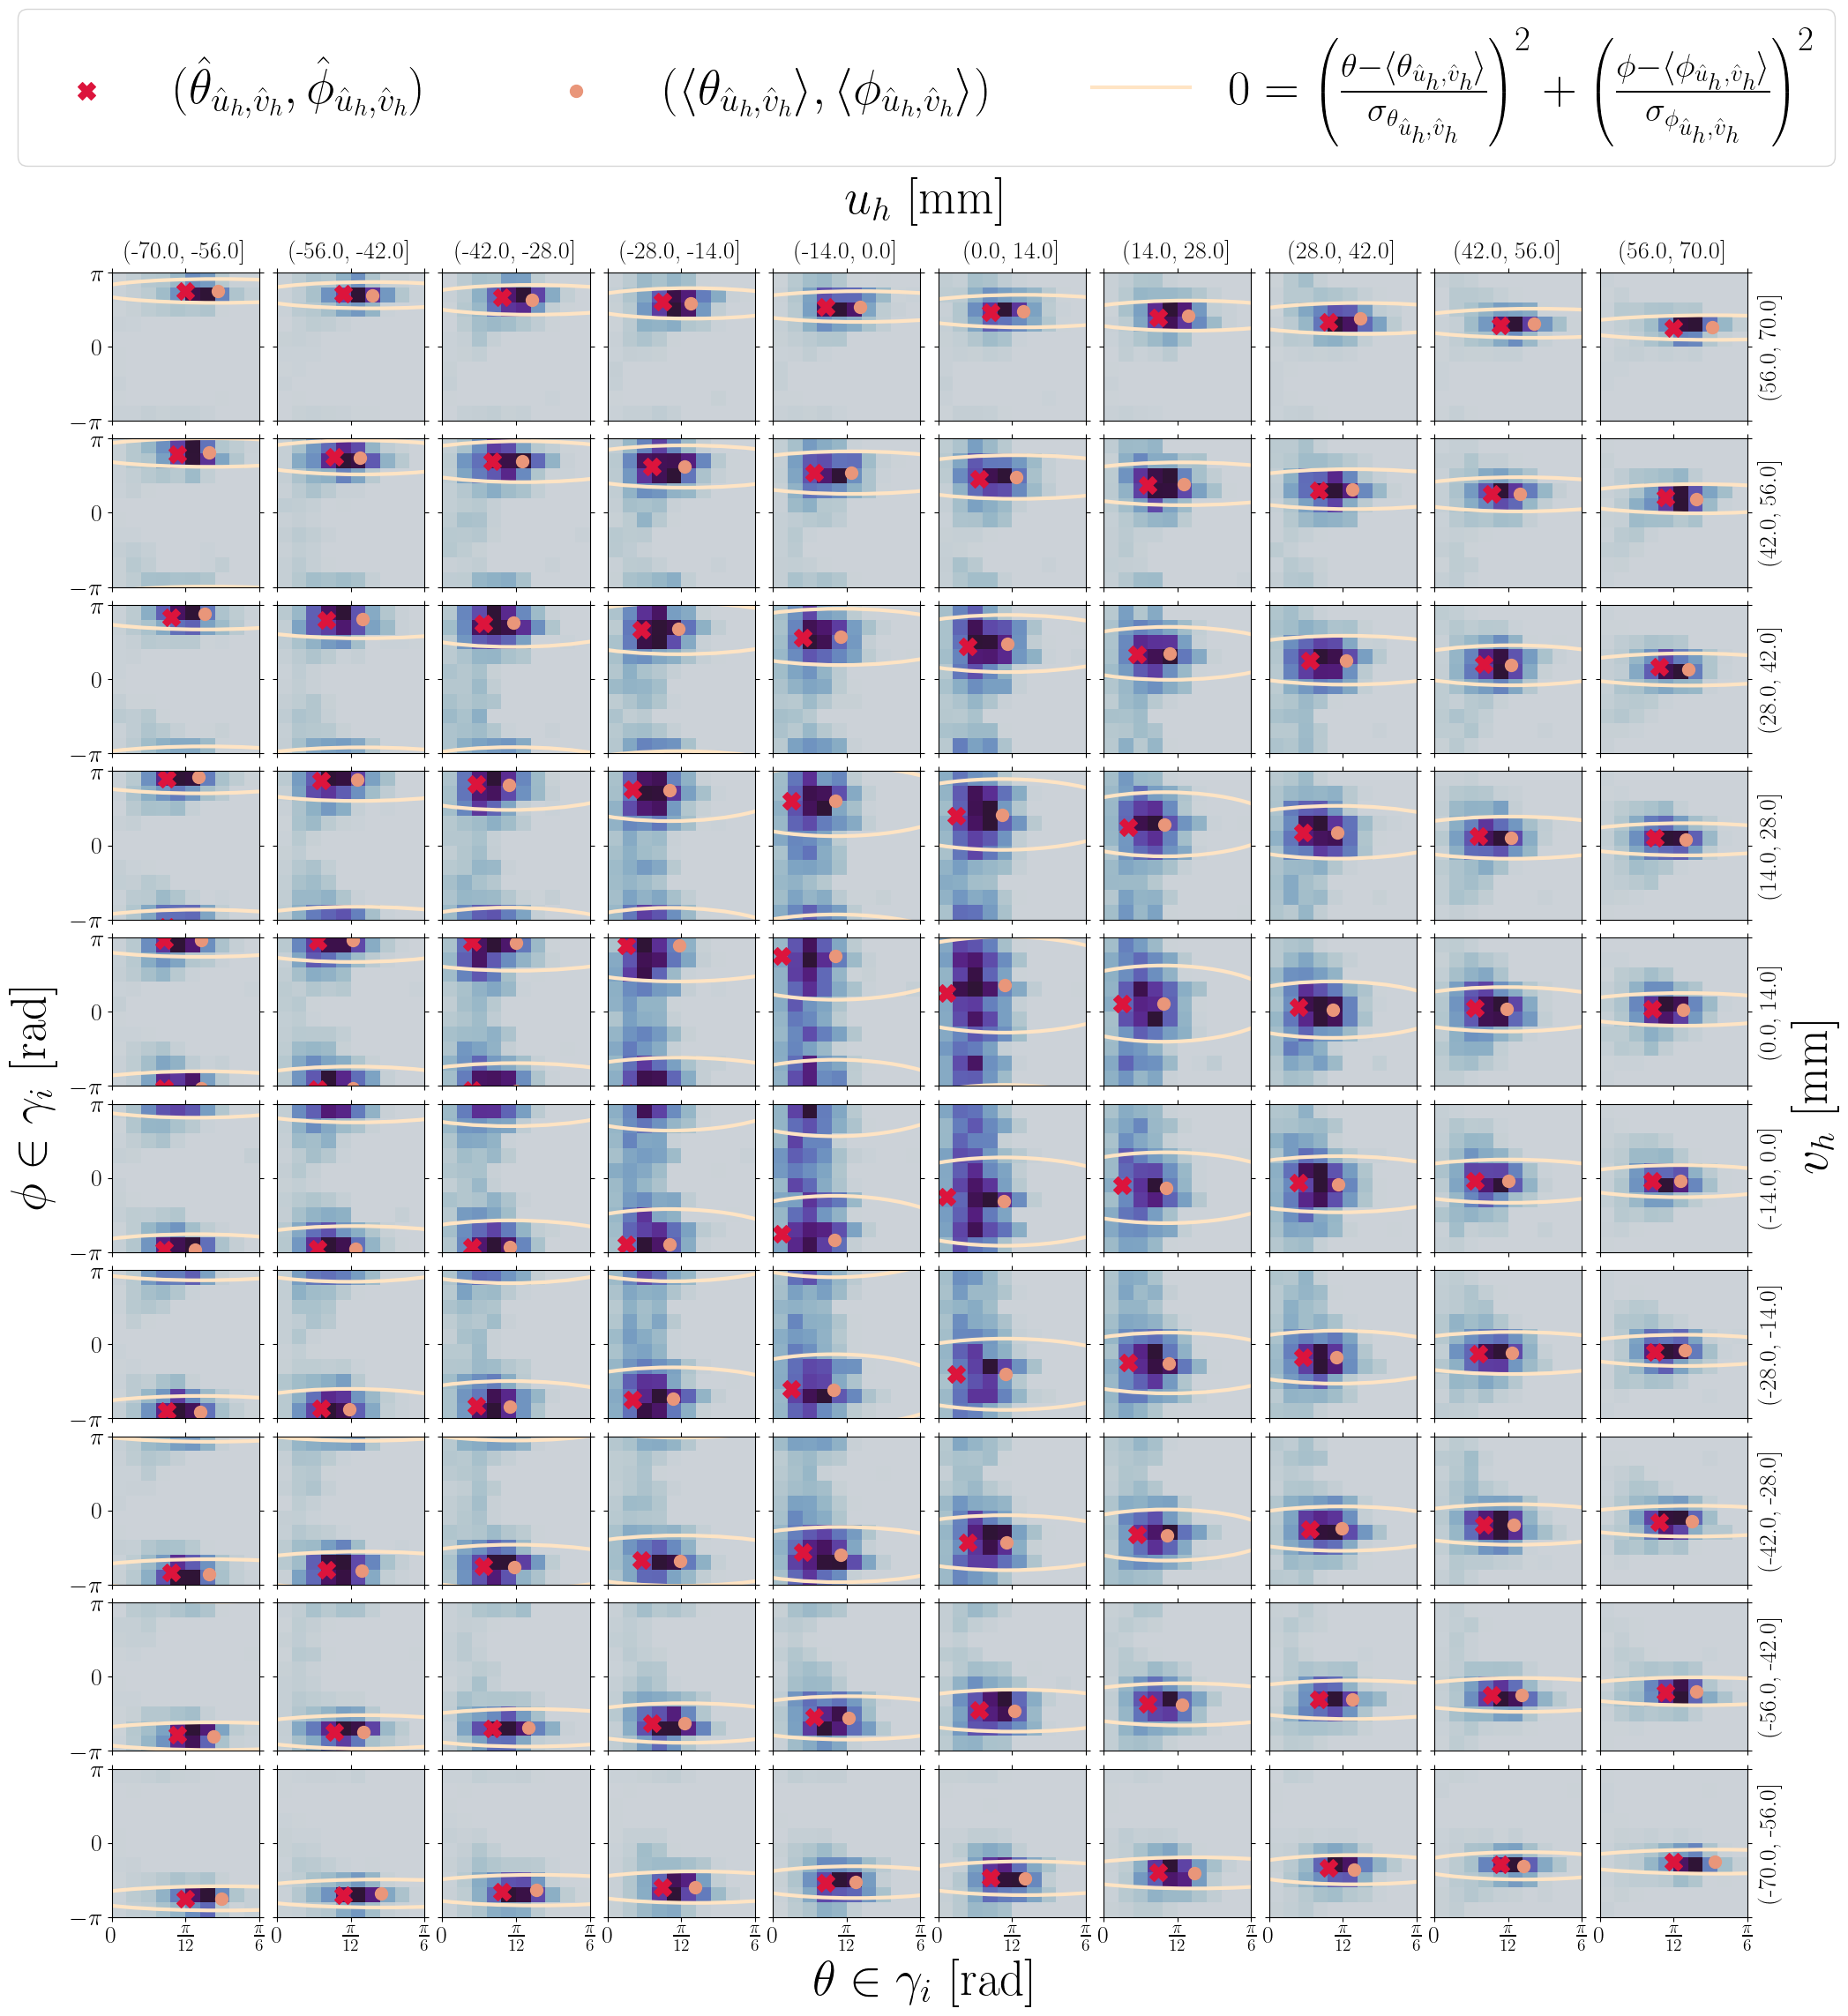

In [ ]:
from matplotlib.patches import Ellipse
from scipy.stats import circstd, circmean

lw = 3
# lc = 'pink'
lc = 'bisque'
# cmap = 'cividis'
# cmap = 'viridis'
# cmap = ListedColormap(cm.twilight(np.linspace(0.5, 0.9, 256)))
cmap = ListedColormap(cm.twilight(np.linspace(0.05, 0.5, 256)))
c1 = 'darksalmon'
c2 = 'crimson'

relativePositionBin = df_hits['relativePosition_nBin'].unique()

fig, ax = plt.subplots(nBins_x, nBins_y, figsize=(20, 20))

theta_max = np.pi/6

for nx in range(nBins_x):
    for ny in range(nBins_y):
        # newX = ax[nBins_y - 1 - ny, nx].twinx()
        # newY = ax[nBins_y - 1 - ny, nx].twiny()

        ind = (df_hits['relativePosition_nBin'] == (nx, ny)).to_list()
        pos = np.array(df_hits['relativePosition_binned'].loc[ind].to_list())
        pos = np.unique(pos)
        bin_x = np.array(df_hits['relativePosition_bins_x'].loc[ind].to_list())
        bin_x = np.unique(bin_x)
        if len(bin_x) == 0:
            continue
        bin_y = np.array(df_hits['relativePosition_bins_y'].loc[ind].to_list())
        bin_y = np.unique(bin_y)
        phi = np.array(df_hits['direction_relative_lens_0_phi'].loc[ind].to_list())
        theta = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())
        r_r = np.array(df_hits['r'].loc[ind].to_list())
        r_r = np.unique(r_r)
        phi_r = np.array(df_hits['phi'].loc[ind].to_list())
        phi_r = np.unique(phi_r)
        theta_r = np.array(df_hits['theta'].loc[ind].to_list())
        theta_r = np.unique(theta_r)

        if len(theta) < lowerBound:
            continue

        ind = np.isnan(theta)
        theta = theta[~ind]
        phi = phi[~ind]

        ind = np.isnan(phi)
        theta = theta[~ind]
        phi = phi[~ind]

        # Convert phi from [0, 2pi) to [-pi, pi)
        phi = (phi + np.pi) % (2 * np.pi) - np.pi
        
        ax[nBins_y - 1 - ny, nx].hist2d(theta, phi, bins=10, norm=None, cmap=cmap, range=[[0, theta_max], [-np.pi, np.pi]], density=True)
        
        # Calculate mean and standard deviation
        mean_theta = np.mean(theta)
        mean_phi = circmean(phi)  # Using circular mean
        std_theta = np.std(theta)
        std_phi = circstd(phi)  # Using circular standard deviation
        
        # Check if ellipse crosses phi = pi boundary
        if mean_phi - std_phi < -np.pi:
            # Plot the first part of the ellipse
            ellipse1 = Ellipse((mean_theta, mean_phi), std_theta*2, std_phi*2, edgecolor=lc, facecolor='none', angle=0, linewidth=lw)
            ax[nBins_y - 1 - ny, nx].add_patch(ellipse1)
            ellipse1.set_clip_box(ax[nBins_y - 1 - ny, nx].bbox)
            ellipse1.set_alpha(1)
            
            # Plot the second part of the ellipse, offset by 2π
            ellipse2 = Ellipse((mean_theta, mean_phi + 2*np.pi), std_theta*2, std_phi*2, edgecolor=lc, facecolor='none', angle=0, linewidth=lw)
            ax[nBins_y - 1 - ny, nx].add_patch(ellipse2)
            ellipse2.set_clip_box(ax[nBins_y - 1 - ny, nx].bbox)
            ellipse2.set_alpha(1)
            
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([theta_r   ])), boundAngle(np.array([phi_r   ])), color=c2, s=200, marker='X')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([mean_theta])), boundAngle(np.array([mean_phi])), color=c1, s=100, marker='o')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([theta_r   ])), boundAngle(np.array([phi_r   ])) + 2*np.pi, color=c2, s=200, marker='X')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([mean_theta])), boundAngle(np.array([mean_phi])) + 2*np.pi, color=c1, s=100, marker='o')
        elif mean_phi + std_phi > np.pi:
            # Plot the first part of the ellipse
            ellipse1 = Ellipse((mean_theta, mean_phi), std_theta*2, std_phi*2, edgecolor=lc, facecolor='none', angle=0, linewidth=lw)
            ax[nBins_y - 1 - ny, nx].add_patch(ellipse1)
            ellipse1.set_clip_box(ax[nBins_y - 1 - ny, nx].bbox)
            ellipse1.set_alpha(1)
            
            # Plot the second part of the ellipse, offset by 2π
            ellipse2 = Ellipse((mean_theta, mean_phi - 2*np.pi), std_theta*2, std_phi*2, edgecolor=lc, facecolor='none', angle=0, linewidth=lw)
            ax[nBins_y - 1 - ny, nx].add_patch(ellipse2)
            ellipse2.set_clip_box(ax[nBins_y - 1 - ny, nx].bbox)
            ellipse2.set_alpha(1)

            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([theta_r   ])), boundAngle(np.array([phi_r   ])), color=c2, s=200, marker='X')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([mean_theta])), boundAngle(np.array([mean_phi])), color=c1, s=100, marker='o')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([theta_r   ])), boundAngle(np.array([phi_r   ])) - 2*np.pi, color=c2, s=200, marker='X')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([mean_theta])), boundAngle(np.array([mean_phi])) - 2*np.pi, color=c1, s=100, marker='o')
        else:
            # Draw single ellipse
            ellipse = Ellipse((mean_theta, mean_phi), std_theta*2, std_phi*2, edgecolor=lc, facecolor='none', angle=0, linewidth=lw)
            ax[nBins_y - 1 - ny, nx].add_patch(ellipse)
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([theta_r   ])), boundAngle(np.array([phi_r   ])), color=c2, s=200, marker='X')
            ax[nBins_y - 1 - ny, nx].scatter(boundAngle(np.array([mean_theta])), boundAngle(np.array([mean_phi])), color=c1, s=100, marker='o')
        
        # ax[nBins_y - 1 - ny, nx].scatter(mean_theta, mean_phi, color='purple', s=100, marker='o')
        # ax[nBins_y - 1 - ny, nx].scatter(theta_r, phi_r, color='red', s=200, marker='X')
        
        ax[nBins_y - 1 - ny, nx].set_xticks([0, np.pi/12, np.pi/6])
        ax[nBins_y - 1 - ny, nx].set_yticks([-np.pi, 0, np.pi])
        ax[nBins_y - 1 - ny, nx].set_xticklabels([])
        ax[nBins_y - 1 - ny, nx].set_yticklabels([])
        ax[nBins_y - 1 - ny, nx].set_xlim(0, theta_max)
        ax[nBins_y - 1 - ny, nx].set_ylim(-np.pi, np.pi)
        ax[nBins_y - 1 - ny, nx].set_xlabel(bin_x[0], labelpad=8)
        ax[nBins_y - 1 - ny, nx].set_ylabel(bin_y[0], labelpad=5)
        ax[nBins_y - 1 - ny, nx].xaxis.set_label_position('top')
        ax[nBins_y - 1 - ny, nx].yaxis.set_label_position('right')
        ax[nBins_y - 1 - ny, nx].tick_params(axis='x', bottom=True, top=True)
        ax[nBins_y - 1 - ny, nx].tick_params(axis='y', left=True, right=True)

nTicks = 3
for a in ax[-1,:]:
    a.set_xticks([0, np.pi/12, np.pi/6])
    a.set_xticklabels([r'$0$', r'$\frac{\pi}{12}$', r'$\frac{\pi}{6}$'])
for a in ax[:,0]:
    a.set_yticks([-np.pi, 0, np.pi])
    a.set_yticklabels([r'$-\pi$', r'$0$', r'$\pi$'])

for a in ax[:,:-1].flatten():
    a.set_ylabel('')
for a in ax[1:,:].flatten():
    a.set_xlabel('')
        
thetaSubscript = r'\theta_{\hat{u}_h,\hat{v}_h}'
phiSubscript = r'\phi_{\hat{u}_h,\hat{v}_h}'
thetaHatSubscript = r'\hat{\theta}_{\hat{u}_h,\hat{v}_h}'
phiHatSubscript = r'\hat{\phi}_{\hat{u}_h,\hat{v}_h}'
thetaMeanSubscript = r'\langle' + thetaSubscript + r'\rangle'
phiMeanSubscript = r'\langle' + phiSubscript + r'\rangle'
thetaName = r'\theta'
phiName = r'\phi'

# ax[0, 0].scatter([],[], color='purple', s=100, marker='o', label=r'$(\langle\theta\rangle,\langle\phi\rangle)$') # label='Mean')
# ax[0, 0].scatter([],[], color=c1, s=100, marker='o', label=r'$(\langle\theta_{\hat{u}_h,\hat{v}_h}\rangle,\langle\phi_{\hat{u}_h,\hat{v}_h}\rangle)$') # label='Mean')
ax[0, 0].scatter([],[], color=c2, s=200, marker='X', label=r'$(' + thetaHatSubscript + ', ' + phiHatSubscript + ')$') # label='Reconstructed')
# ax[0, 0].scatter([],[], color='red'   , s=200, marker='X', label=r'$(\hat{\theta}(\hat{u}_h,\hat{v}_h),\hat{\phi}(\hat{u}_h,\hat{v}_h))$') # label='Reconstructed')
# ax[0, 0].scatter([],[], color=c2   , s=200, marker='X', label=r'$(\hat{\theta}_{\hat{u}_h,\hat{v}_h},\hat{\phi}_{\hat{u}_h,\hat{v}_h})$') # label='Reconstructed')
ax[0, 0].scatter([],[], color=c1      , s=100, marker='o', label=r'$(' + thetaMeanSubscript + ', ' + phiMeanSubscript + ')$') # label='Reconstructed')
# ax[0, 0].plot   ([],[], color=lc      , linewidth=lw     , label=r'$0=\left(\frac{\theta-\langle\theta\rangle}{\sigma_{\theta}}\right)^2+\left(\frac{\phi-\langle\phi\rangle}{\sigma_{\phi}}\right)^2$') # label='Standard Deviation')
ax[0, 0].plot   ([],[], color=lc      , linewidth=lw     , label=r'$0=\left(\frac{' + thetaName + '-' + thetaMeanSubscript + r'}{\sigma_{' + thetaSubscript + r'}}\right)^2+\left(\frac{' + phiName + '-' + phiMeanSubscript + r'}{\sigma_{' + phiSubscript + r'}}\right)^2$') # label='Standard Deviation')
                 # label='Standard Deviation')

fig.text(0.5, -0.01, r'$\theta\in\gamma_i$ [rad]', ha='center', fontsize=40)
fig.text(-0.02, 0.5, r'$\phi\in\gamma_i$ [rad]'   , va='center', fontsize=40, rotation='vertical')
fig.text(0.5, 1.00, r'$u_h$ [mm]', ha='center', fontsize=40)
fig.text(0.99, 0.5, r'$v_h$ [mm]', va='center', fontsize=40, rotation='vertical')

fig.tight_layout(h_pad=-0.15, w_pad=0.3)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), fontsize=40, ncol=3)

# plt.savefig('../figures/relativePositionVsIncomingDirection.pdf', bbox_inches='tight')
plt.show()